<a href="https://colab.research.google.com/github/lucasdonizete/RedesNeurais/blob/main/Trabalho_02MLPClassifier_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Impotando bibliotecas para execução no código
from matplotlib import pyplot as plt
from PIL import Image #Usada para abrir e tratar imagens
import numpy as np #Usada para cálculos 
import pandas as pd #Usada na disposição de informações
import os #Usada para interação com sistema
import cv2 #Usada para imagens
import re, random #Biblioteca para suporte/modificadores

from sklearn.neural_network import MLPClassifier #Ferramenta de classficação das imagens
from sklearn import preprocessing #Usada para pre-tratamento e normalização de valores
from sklearn.model_selection import train_test_split #Usada para particionar os dados em treino e teste
from sklearn.metrics import classification_report   #Usada para métricas da classficação/acurácia
import random #gera valores aleatórios


In [2]:
!gdown --id 1SGIUSATQ0lQXv4nXOjmsmlbVPhfBEeSO  #Comando para download das imagens do drive

Downloading...
From: https://drive.google.com/uc?id=1SGIUSATQ0lQXv4nXOjmsmlbVPhfBEeSO
To: /content/ann_dogs.zip
6.82MB [00:00, 25.9MB/s]


In [19]:
#Importa as imagens da pasta e extrai
import zipfile
file_name = zipfile.ZipFile('ann_dogs.zip', 'r')
file_name.extractall()

In [4]:
# Carrega as imagens e ajustada formato e cor.
FILE='ann_dogs.zip'
Img_Size = 100
img_name=[]
x_gray=[]
x_original = []
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)
        x_gray.append(cv2.resize(cv2.imread(name, 3),(Img_Size,Img_Size)))

In [5]:
# coloca as tres primeiras letras e lista todas as imagens, sendo BAS: basset; BULL: bulldog; LAB: labrado e POO: poodle
y_names = [] 
for yy in img_name:]
  name = yy[9]+yy[10]+yy[11]
  y_names.append(name)

In [6]:
#cria a lista da ann
unique_list = []    
for yy in y_names: 
  if yy not in unique_list:
    unique_list.append(yy)
unique_list

['BAS', 'BUL', 'LAB', 'POO']

In [23]:
#Estratégia para relacionar cada categoria a números 
n = len(unique_list) #captura o tamnho da lista
y = [] #lista em branco
for yy in y_names:
  for i in range(n):
    if(yy == unique_list[i]):
      y.append(i)     

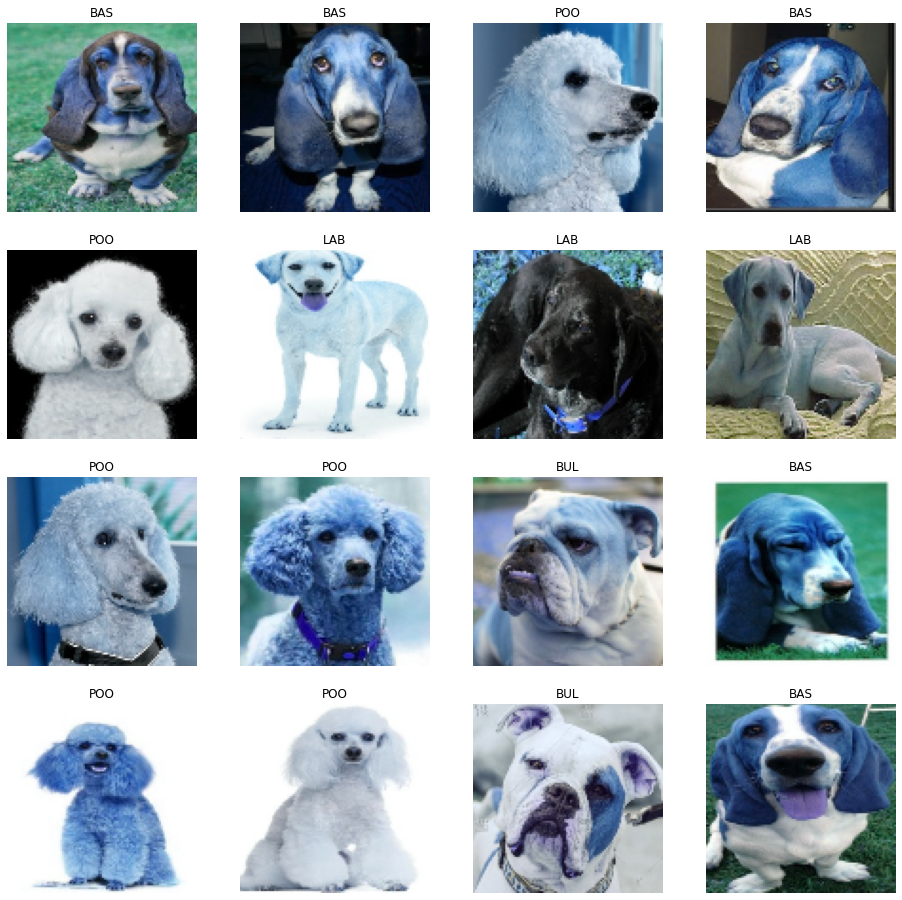

In [8]:
#mostra fotos aleatorias do banco de dados
num = len(y_names)
plt.figure(figsize=(16, 16))
for i in range(16): #mostra fotos aleatorias da biblioteca
  ax = plt.subplot(4, 4, i + 1)
  kk = random.randrange(num) 
  plt.imshow(x_gray[kk])
  plt.title(y_names[kk])
  plt.axis("off")

In [9]:
#transforma as fotos/matrizes em linhas
x_data = []
for xx in x_gray:
  x_data.append(xx.ravel()) 
X = pd.DataFrame(x_data)

In [10]:
#separa em treino (80%) e teste(20%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, shuffle=True, random_state=3) 

In [11]:
#normaliza todos os dados, o do treino e do teste
scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X) 
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)


In [12]:
#Grid search para definir o número de neuronios adequados 
for i in range(3,15):
  for j in range(3,15):
    # define a rede neural 
    model = MLPClassifier(solver='adam',activation='tanh',alpha=1e-5,hidden_layer_sizes=(i,j),
                         random_state=1,max_iter=1000)
   # treina a rede neural
    model.fit(X_train, y_train)
   
    y_calc_train=model.predict(X_train)
    y_calc_test=model.predict(X_test)
    y_true = y_test
    y_pred = y_calc_test
    #Exibe as métricas da classificação
    target_names = ['Basset', 'Bulldog', 'Labrador', 'Poodle']
    print(i,j)
    print(classification_report(y_true, y_pred, target_names=target_names))
    print("================")


3 3
              precision    recall  f1-score   support

      Basset       0.69      0.39      0.50        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.50      0.61      0.55        23
      Poodle       0.29      0.55      0.37        11

    accuracy                           0.47        62
   macro avg       0.37      0.39      0.36        62
weighted avg       0.49      0.47      0.46        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3 4
              precision    recall  f1-score   support

      Basset       0.89      0.35      0.50        23
     Bulldog       0.75      0.60      0.67         5
    Labrador       0.56      0.83      0.67        23
      Poodle       0.40      0.55      0.46        11

    accuracy                           0.58        62
   macro avg       0.65      0.58      0.57        62
weighted avg       0.67      0.58      0.57        62

3 5
              precision    recall  f1-score   support

      Basset       0.70      0.70      0.70        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.50      0.78      0.61        23
      Poodle       0.00      0.00      0.00        11

    accuracy                           0.55        62
   macro avg       0.30      0.37      0.33        62
weighted avg       0.44      0.55      0.48        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3 6
              precision    recall  f1-score   support

      Basset       0.75      0.39      0.51        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.55      0.74      0.63        23
      Poodle       0.47      0.64      0.54        11

    accuracy                           0.53        62
   macro avg       0.44      0.44      0.42        62
weighted avg       0.56      0.53      0.52        62

3 7
              precision    recall  f1-score   support

      Basset       0.67      0.26      0.38        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.45      0.78      0.57        23
      Poodle       0.55      0.55      0.55        11

    accuracy                           0.48        62
   macro avg       0.42      0.40      0.37        62
weighted avg       0.51      0.48      0.45        62

3 8
              precision    recall  f1-score   support

      Basset       0.56      0.39      0.46        23
     Bull

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3 12
              precision    recall  f1-score   support

      Basset       0.55      0.48      0.51        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.55      0.70      0.62        23
      Poodle       0.27      0.27      0.27        11

    accuracy                           0.48        62
   macro avg       0.34      0.36      0.35        62
weighted avg       0.46      0.48      0.47        62

3 13
              precision    recall  f1-score   support

      Basset       0.60      0.39      0.47        23
     Bulldog       0.17      0.20      0.18         5
    Labrador       0.58      0.78      0.67        23
      Poodle       0.50      0.45      0.48        11

    accuracy                           0.53        62
   macro avg       0.46      0.46      0.45        62
weighted avg       0.54      0.53      0.52        62

3 14
              precision    recall  f1-score   support

      Basset       0.67      0.17      0.28        23
     B

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4 3
              precision    recall  f1-score   support

      Basset       0.68      0.57      0.62        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.55      0.78      0.64        23
      Poodle       0.56      0.45      0.50        11

    accuracy                           0.58        62
   macro avg       0.45      0.45      0.44        62
weighted avg       0.55      0.58      0.56        62

4 4
              precision    recall  f1-score   support

      Basset       0.68      0.57      0.62        23
     Bulldog       0.33      0.40      0.36         5
    Labrador       0.56      0.61      0.58        23
      Poodle       0.33      0.36      0.35        11

    accuracy                           0.53        62
   macro avg       0.48      0.48      0.48        62
weighted avg       0.55      0.53      0.54        62

4 5
              precision    recall  f1-score   support

      Basset       0.85      0.48      0.61        23
     Bull

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4 8
              precision    recall  f1-score   support

      Basset       0.54      0.57      0.55        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.50      0.52      0.51        23
      Poodle       0.43      0.55      0.48        11

    accuracy                           0.50        62
   macro avg       0.37      0.41      0.39        62
weighted avg       0.46      0.50      0.48        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4 9
              precision    recall  f1-score   support

      Basset       0.92      0.52      0.67        23
     Bulldog       0.50      0.20      0.29         5
    Labrador       0.68      0.91      0.78        23
      Poodle       0.50      0.73      0.59        11

    accuracy                           0.68        62
   macro avg       0.65      0.59      0.58        62
weighted avg       0.72      0.68      0.66        62

4 10
              precision    recall  f1-score   support

      Basset       0.69      0.39      0.50        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.52      0.61      0.56        23
      Poodle       0.29      0.55      0.37        11

    accuracy                           0.47        62
   macro avg       0.37      0.39      0.36        62
weighted avg       0.50      0.47      0.46        62

4 11
              precision    recall  f1-score   support

      Basset       0.83      0.22      0.34        23
     Bu

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 4
              precision    recall  f1-score   support

      Basset       0.82      0.39      0.53        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.51      0.78      0.62        23
      Poodle       0.38      0.55      0.44        11

    accuracy                           0.53        62
   macro avg       0.43      0.43      0.40        62
weighted avg       0.56      0.53      0.51        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 5
              precision    recall  f1-score   support

      Basset       0.69      0.48      0.56        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.54      0.65      0.59        23
      Poodle       0.29      0.36      0.32        11

    accuracy                           0.48        62
   macro avg       0.38      0.37      0.37        62
weighted avg       0.50      0.48      0.48        62

5 6
              precision    recall  f1-score   support

      Basset       0.62      0.43      0.51        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.62      0.65      0.64        23
      Poodle       0.47      0.64      0.54        11

    accuracy                           0.52        62
   macro avg       0.43      0.43      0.42        62
weighted avg       0.55      0.52      0.52        62

5 7
              precision    recall  f1-score   support

      Basset       0.83      0.22      0.34        23
     Bull

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5 10
              precision    recall  f1-score   support

      Basset       0.62      0.35      0.44        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.45      0.65      0.54        23
      Poodle       0.33      0.45      0.38        11

    accuracy                           0.45        62
   macro avg       0.35      0.36      0.34        62
weighted avg       0.46      0.45      0.43        62

5 11
              precision    recall  f1-score   support

      Basset       0.60      0.39      0.47        23
     Bulldog       0.14      0.20      0.17         5
    Labrador       0.50      0.35      0.41        23
      Poodle       0.29      0.64      0.40        11

    accuracy                           0.40        62
   macro avg       0.38      0.39      0.36        62
weighted avg       0.47      0.40      0.41        62

5 12
              precision    recall  f1-score   support

      Basset       0.72      0.57      0.63        23
     B

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6 5
              precision    recall  f1-score   support

      Basset       0.86      0.26      0.40        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.50      0.74      0.60        23
      Poodle       0.30      0.55      0.39        11

    accuracy                           0.47        62
   macro avg       0.41      0.39      0.35        62
weighted avg       0.56      0.47      0.44        62

6 6
              precision    recall  f1-score   support

      Basset       0.80      0.35      0.48        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.52      0.57      0.54        23
      Poodle       0.25      0.45      0.32        11

    accuracy                           0.42        62
   macro avg       0.39      0.34      0.34        62
weighted avg       0.53      0.42      0.44        62

6 7
              precision    recall  f1-score   support

      Basset       0.73      0.35      0.47        23
     Bull

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6 8
              precision    recall  f1-score   support

      Basset       0.53      0.35      0.42        23
     Bulldog       0.67      0.40      0.50         5
    Labrador       0.52      0.57      0.54        23
      Poodle       0.21      0.36      0.27        11

    accuracy                           0.44        62
   macro avg       0.48      0.42      0.43        62
weighted avg       0.48      0.44      0.44        62

6 9
              precision    recall  f1-score   support

      Basset       0.81      0.57      0.67        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.56      0.65      0.60        23
      Poodle       0.33      0.55      0.41        11

    accuracy                           0.55        62
   macro avg       0.43      0.44      0.42        62
weighted avg       0.57      0.55      0.54        62

6 10
              precision    recall  f1-score   support

      Basset       0.59      0.43      0.50        23
     Bul

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6 13
              precision    recall  f1-score   support

      Basset       0.50      0.43      0.47        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.42      0.57      0.48        23
      Poodle       0.18      0.18      0.18        11

    accuracy                           0.40        62
   macro avg       0.28      0.30      0.28        62
weighted avg       0.37      0.40      0.38        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6 14
              precision    recall  f1-score   support

      Basset       0.73      0.48      0.58        23
     Bulldog       0.20      0.20      0.20         5
    Labrador       0.53      0.78      0.63        23
      Poodle       0.62      0.45      0.53        11

    accuracy                           0.56        62
   macro avg       0.52      0.48      0.48        62
weighted avg       0.60      0.56      0.56        62

7 3
              precision    recall  f1-score   support

      Basset       0.77      0.43      0.56        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.42      0.57      0.48        23
      Poodle       0.28      0.45      0.34        11

    accuracy                           0.45        62
   macro avg       0.37      0.36      0.35        62
weighted avg       0.49      0.45      0.45        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


7 4
              precision    recall  f1-score   support

      Basset       0.62      0.43      0.51        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.58      0.61      0.60        23
      Poodle       0.42      0.73      0.53        11

    accuracy                           0.52        62
   macro avg       0.41      0.44      0.41        62
weighted avg       0.52      0.52      0.51        62

7 5
              precision    recall  f1-score   support

      Basset       0.69      0.39      0.50        23
     Bulldog       0.27      0.60      0.37         5
    Labrador       0.52      0.70      0.59        23
      Poodle       0.57      0.36      0.44        11

    accuracy                           0.52        62
   macro avg       0.51      0.51      0.48        62
weighted avg       0.57      0.52      0.51        62

7 6
              precision    recall  f1-score   support

      Basset       0.68      0.65      0.67        23
     Bull

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9 4
              precision    recall  f1-score   support

      Basset       0.88      0.61      0.72        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.56      0.65      0.60        23
      Poodle       0.42      0.73      0.53        11

    accuracy                           0.60        62
   macro avg       0.46      0.50      0.46        62
weighted avg       0.61      0.60      0.58        62



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9 5
              precision    recall  f1-score   support

      Basset       0.78      0.30      0.44        23
     Bulldog       0.25      0.20      0.22         5
    Labrador       0.48      0.87      0.62        23
      Poodle       0.57      0.36      0.44        11

    accuracy                           0.52        62
   macro avg       0.52      0.43      0.43        62
weighted avg       0.59      0.52      0.49        62

9 6
              precision    recall  f1-score   support

      Basset       0.71      0.43      0.54        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.52      0.70      0.59        23
      Poodle       0.36      0.45      0.40        11

    accuracy                           0.50        62
   macro avg       0.40      0.40      0.38        62
weighted avg       0.52      0.50      0.49        62

9 7
              precision    recall  f1-score   support

      Basset       0.62      0.43      0.51        23
     Bull

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


9 12
              precision    recall  f1-score   support

      Basset       0.67      0.43      0.53        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.52      0.70      0.59        23
      Poodle       0.40      0.55      0.46        11

    accuracy                           0.52        62
   macro avg       0.40      0.42      0.40        62
weighted avg       0.51      0.52      0.50        62

9 13
              precision    recall  f1-score   support

      Basset       0.82      0.39      0.53        23
     Bulldog       0.17      0.20      0.18         5
    Labrador       0.62      0.70      0.65        23
      Poodle       0.26      0.45      0.33        11

    accuracy                           0.50        62
   macro avg       0.47      0.44      0.42        62
weighted avg       0.59      0.50      0.51        62

9 14
              precision    recall  f1-score   support

      Basset       0.56      0.43      0.49        23
     B

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


10 10
              precision    recall  f1-score   support

      Basset       0.82      0.39      0.53        23
     Bulldog       0.22      0.40      0.29         5
    Labrador       0.50      0.70      0.58        23
      Poodle       0.30      0.27      0.29        11

    accuracy                           0.48        62
   macro avg       0.46      0.44      0.42        62
weighted avg       0.56      0.48      0.49        62

10 11
              precision    recall  f1-score   support

      Basset       0.85      0.48      0.61        23
     Bulldog       0.20      0.20      0.20         5
    Labrador       0.52      0.65      0.58        23
      Poodle       0.33      0.45      0.38        11

    accuracy                           0.52        62
   macro avg       0.47      0.45      0.44        62
weighted avg       0.58      0.52      0.53        62

10 12
              precision    recall  f1-score   support

      Basset       0.55      0.26      0.35        23
   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


11 4
              precision    recall  f1-score   support

      Basset       0.58      0.30      0.40        23
     Bulldog       0.12      0.20      0.15         5
    Labrador       0.44      0.52      0.48        23
      Poodle       0.27      0.36      0.31        11

    accuracy                           0.39        62
   macro avg       0.35      0.35      0.34        62
weighted avg       0.44      0.39      0.39        62

11 5
              precision    recall  f1-score   support

      Basset       0.85      0.48      0.61        23
     Bulldog       0.00      0.00      0.00         5
    Labrador       0.48      0.70      0.57        23
      Poodle       0.43      0.55      0.48        11

    accuracy                           0.53        62
   macro avg       0.44      0.43      0.42        62
weighted avg       0.57      0.53      0.52        62

11 6
              precision    recall  f1-score   support

      Basset       0.71      0.43      0.54        23
     B